In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

###Generate data

In [2]:
x_train = np.linspace(-1,1,20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
x_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

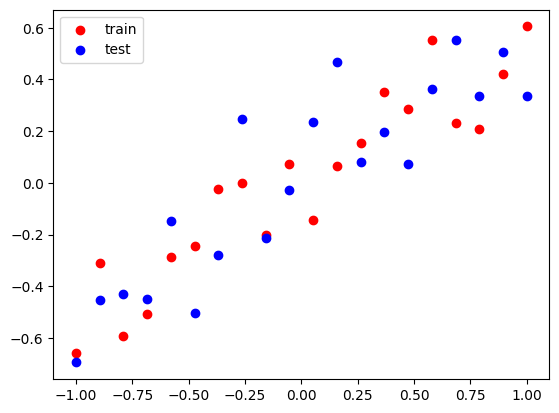

In [9]:
plt.scatter(x_train,y_train,c = 'r',label = 'train')
plt.scatter(x_test,y_test,c = 'b',label = 'test')
plt.legend()
plt.show()

####regression model


In [12]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 1))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
adam = Adam(learning_rate = 0.01)
model.compile(loss ='mse', optimizer = adam, metrics=['mse'])
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 500,verbose = 1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3725 - mse: 0.3725 - val_loss: 0.2967 - val_mse: 0.2967
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - loss: 0.2956 - mse: 0.2956 - val_loss: 0.2308 - val_mse: 0.2308
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.1725 - val_mse: 0.1725
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.1698 - mse: 0.1698 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.1257 - mse: 0.1257 - val_loss: 0.1092 - val_mse: 0.1092
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.1013 - mse: 0.1013 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.0896 - mse: 0.0896 - val_loss: 0.0962 - val_mse: 0.0962
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.0938 - val_mse: 0.0938
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0786 - 

In [14]:
#evaluate the model
_,train_mse = model.evaluate(x_train,y_train,verbose = 1)
_,test_mse = model.evaluate(x_test,y_test,verbose = 1)
print('train: {}, test: {}'.format(train_mse,test_mse))
# print(f'train:{train_mse},test:{test_mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0671 - mse: 0.0671
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1038 - mse: 0.1038
train: 0.06710243970155716, test: 0.10382789373397827
train:0.06710243970155716,test:0.10382789373397827


In [15]:
y_pred1 = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


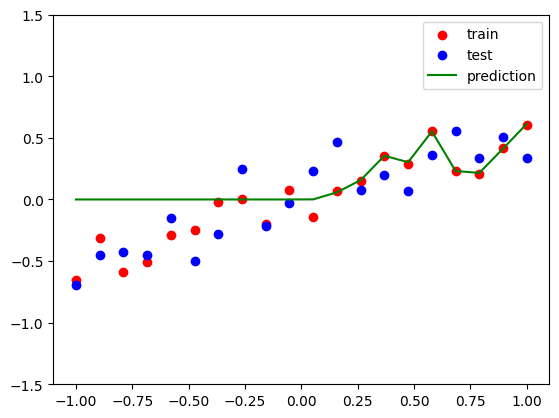

In [17]:
plt.figure()
plt.scatter(x_train,y_train,c = 'r',label = 'train')
plt.scatter(x_test,y_test,c = 'b',label = 'test')
plt.plot(x_test,y_pred1,c = 'g',label = 'prediction')
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

###dropout model

In [21]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 1))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'linear'))
adam = Adam(0.01)
model.compile(loss = 'mse',optimizer = adam, metrics = ['mse'])
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),verbose = False,epochs = 500)

In [22]:
_,train_mse = model.evaluate(x_train,y_train,verbose = 0)
_,test_mse = model.evaluate(x_test,y_test,verbose = 0)
print('train:{},test:{}'.format(train_mse,test_mse))

train:0.011072787456214428,test:0.04737921804189682


In [23]:
y_pred2 = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


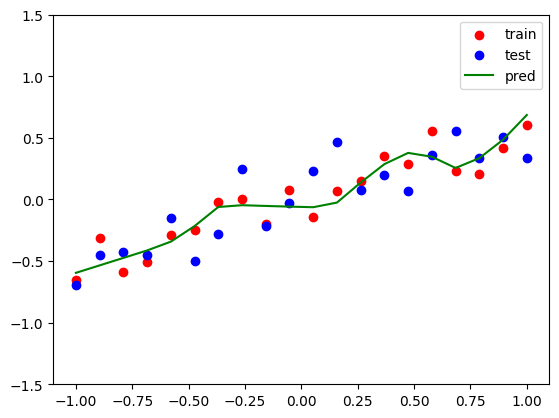

In [25]:
plt.scatter(x_train,y_train,c = 'r', label = 'train')
plt.scatter(x_test,y_test, c = 'b', label = 'test')
plt.plot(x_test,y_pred2, c = 'g',label = 'pred')
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()